In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import interp1d
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import InterpolatedUnivariateSpline

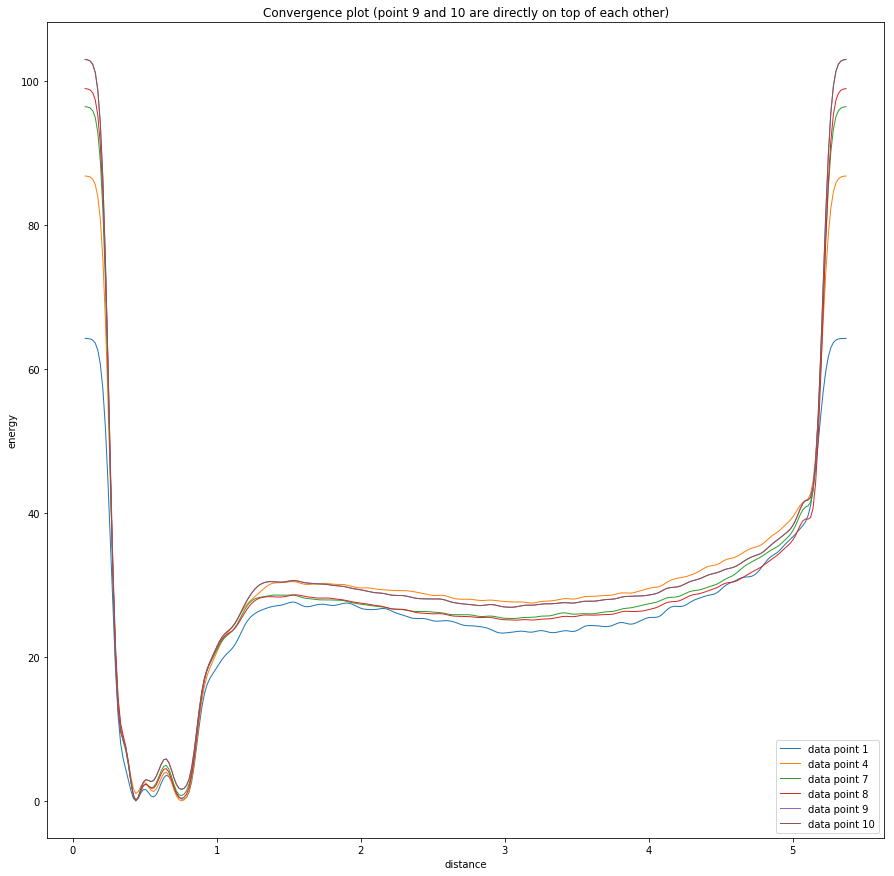

In [2]:
my_list=[1,4,7,8,9,10]   #plots for convergence
data=dict()              #So I can iterate variable names
plt.figure(figsize=(15,15)) #to plot obviously
for i in my_list:
    data[i]=pd.read_csv('files/fes1_'+str(i)+'.dat',skiprows=5,names=['distance','energy','error'],delim_whitespace=True)
    plt.plot(data[i]['distance'],data[i]['energy'], lw=1)

plt.xlabel('distance')
plt.ylabel('energy')
plt.title('Convergence plot (point 9 and 10 are directly on top of each other)')
plt.legend(['data point 1','data point 4','data point 7','data point 8','data point 9','data point 10'])
plt.show()

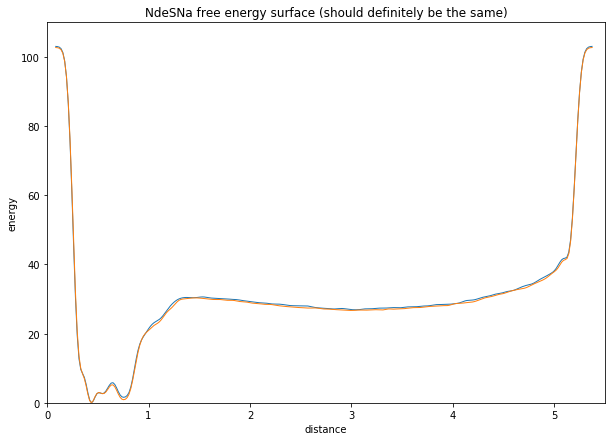

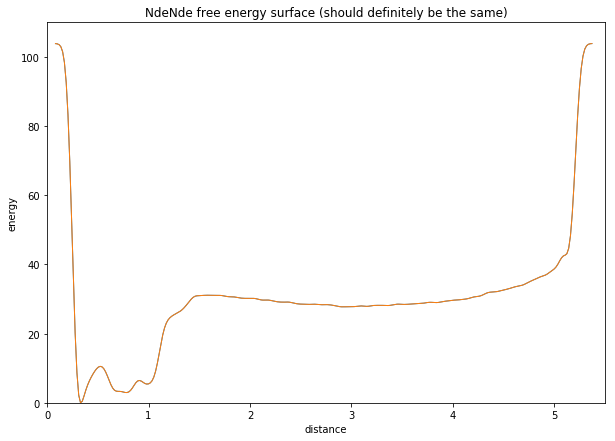

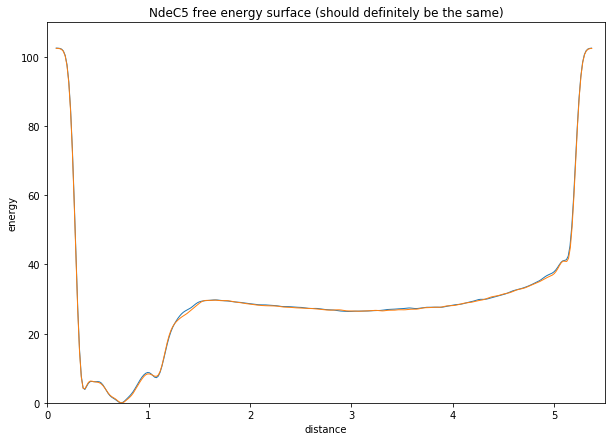

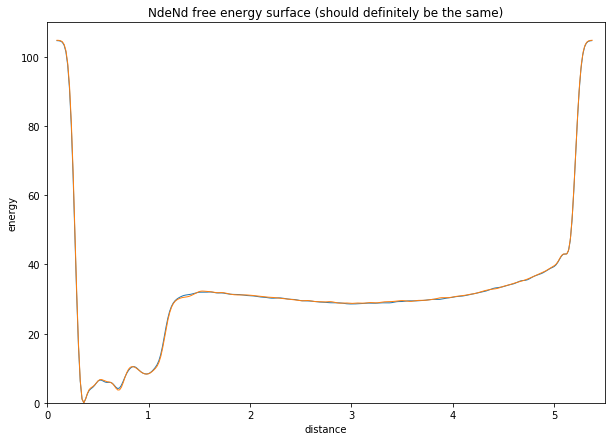

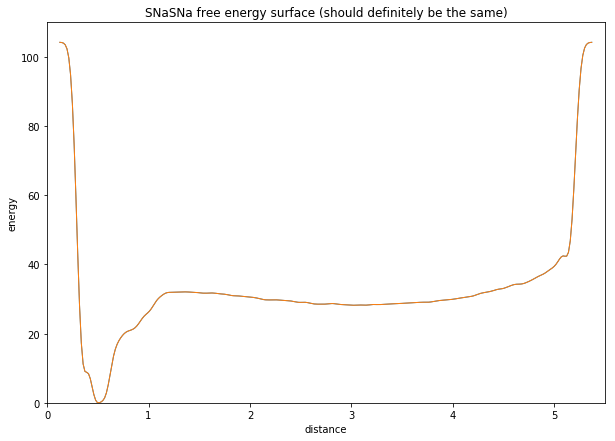

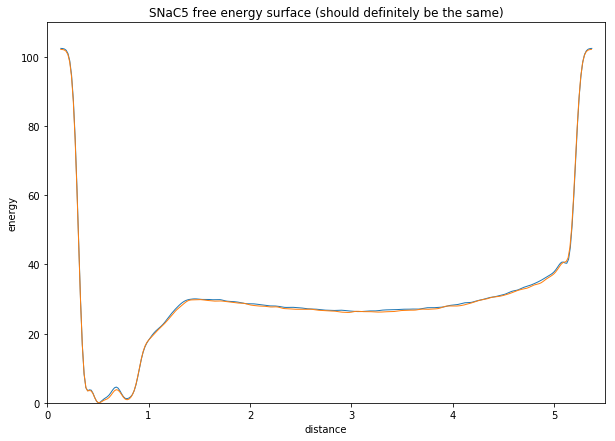

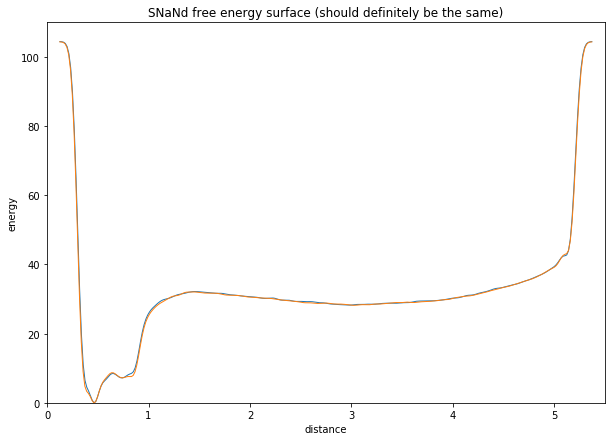

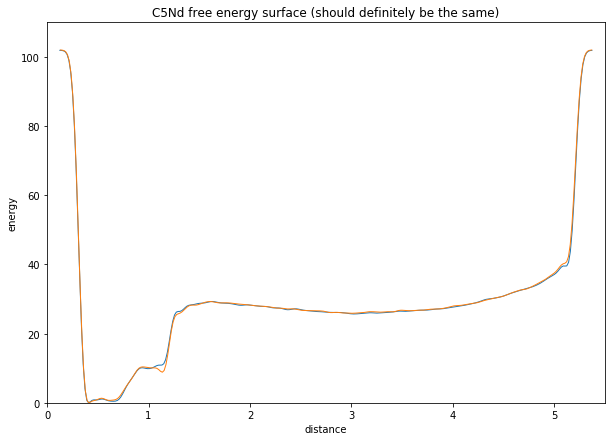

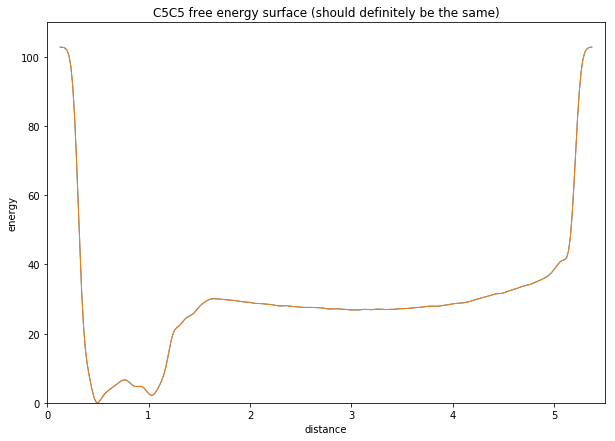

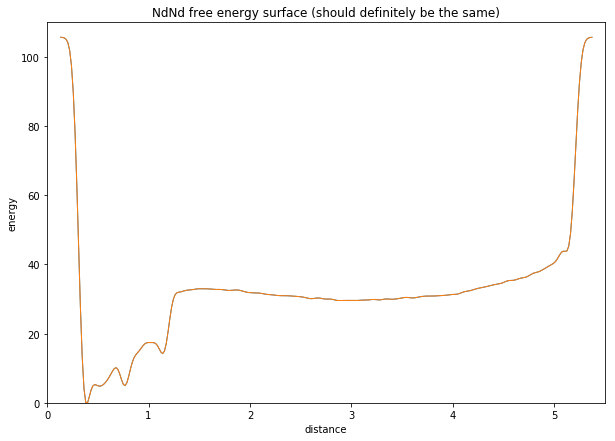

In [167]:
listofinteractions=['NdeSNa','NdeNde','NdeC5','NdeNd','SNaSNa','SNaC5','SNaNd','C5Nd','C5C5','NdNd']
for i in range(1,11):
    filename1='files/fes'+str(i)+'.dat'
    filename2='files/fes'+str(i+10)+'.dat'
    data1=pd.read_csv(filename1,skiprows=5,names=['distance','energy','error'],delim_whitespace=True)
    data2=pd.read_csv(filename2,skiprows=5,names=['distance','energy','error'],delim_whitespace=True)

    plt.figure(figsize=(10,7))
    plt.plot(data1['distance'],data1['energy'],data2['distance'],data2['energy'], lw=1)
    plt.xlabel('distance')
    plt.ylabel('energy')
    plt.ylim([0,110])
    plt.xlim([0,5.5])
    plt.title(listofinteractions[i-1]+' free energy surface (should definitely be the same)')
    plt.show()

In [11]:
data1.tail()

,distance,energy,error
293,5.300171,104.062260,79.522503
294,5.317801,105.038298,35.488933
295,5.335431,105.452474,13.755277
296,5.353060,105.605602,4.638830
297,5.370690,105.658442,1.079595


In [6]:
data2.head()

,distance,energy,error
0,0.134670,105.659365,-1.052862
1,0.152300,105.616015,-4.090124
2,0.169929,105.476843,-12.868323
3,0.187559,105.080232,-35.108248
4,0.205189,104.078349,-84.275980


# Interpolation

In [5]:
f=interp1d(data1['distance'],data1['energy'],kind='cubic',fill_value='extrapolate')
print(f)

In [6]:
xnew=np.arange(data1['distance'].min(),data1['distance'].max(),0.002)

In [7]:
ynew=f(xnew)

print(data1.head())

   distance      energy      error
0  0.134670  105.659365  -1.052862
1  0.152300  105.616015  -4.090124
2  0.169929  105.476843 -12.868323
3  0.187559  105.080232 -35.108248
4  0.205189  104.078349 -84.275980


In [56]:
listofinteractions=['filler','NdeSNa','NdeNde','NdeC5','NdeNd','SNaSNa','SNaC5','SNaNd','C5Nd','C5C5','NdNd','NdeSNa','NdeNde','NdeC5','NdeNd','SNaSNa','SNaC5','SNaNd','C5Nd','C5C5','NdNd']
for i in range(1,21):
    filename='files/fes'+str(i)+'.dat'
    data1=pd.read_csv(filename,skiprows=5,names=['distance','energy','error'],delim_whitespace=True)
    f=interp1d(data1['distance'],data1['energy'],kind='cubic',fill_value='extrapolate')
    xnew=np.arange(0,3,0.03)
    ynew=f(xnew)
    xnew_norm=xnew/(xnew.max())
    #f=interp1d(data1['distance'],data1['energy'],kind='cubic',fill_value='extrapolate')
    #xnew=np.arange(0,3,0.03)
    #ynew=f(xnew)
    
    xnew_norm=xnew/(xnew.max())
    energies=data1['energy']
    fileout=open('fes'+str(i)+'_new.dat','w')
    mi=min(xnew_norm)
    ma=max(xnew_norm)
    nbins=len(xnew_norm)
    if i <= 10:
        n=1
    else:
        n=2
    fileout.write('#! FIELDS d_'+str(listofinteractions[i])+'_'+str(n)+' ext'+str(i)+'.bias der_d_'+str(listofinteractions[i])+'_'+str(n)+'\n')
    fileout.write('#! SET min_d_'+str(listofinteractions[i])+'_'+str(n)+' '+str(mi)+'\n')
    fileout.write('#! SET max_d_'+str(listofinteractions[i])+'_'+str(n)+' '+str(ma)+'\n')
    fileout.write('#! SET nbins_d_'+str(listofinteractions[i])+'_'+str(n)+' '+str(nbins)+'\n')
    fileout.write('#! SET periodic_d_'+str(listofinteractions[i])+'_'+str(n)+' false\n')
    for i in range(len(xnew)):
        fileout.write(' %14f %14f %14f\n' %(float(xnew_norm[i]),float(ynew[i]),float(energies[i])))
    fileout.close()
    

In [31]:
listofinteractions=['filler','NdeSNa','NdeNde','NdeC5','NdeNd','SNaSNa','SNaC5','SNaNd','C5Nd','C5C5','NdNd','NdeSNa','NdeNde','NdeC5','NdeNd','SNaSNa','SNaC5','SNaNd','C5Nd','C5C5','NdNd']


for i in range(1,21):
    filename='files/fes'+str(i)+'.dat'
    data1=pd.read_csv(filename,skiprows=5,names=['distance','energy','error'],delim_whitespace=True)
    f=interp1d(data1['distance'],data1['energy']/10,kind='cubic',fill_value='extrapolate')
    for index,row in data1.iterrows():
    
    
        #df=pd.DataFrame([-row['distance'],row['energy'],row['error']/10])#,columns=['distance','energy','error'])

        #df=df.transpose()
        #df.columns=['distance','energy','error']

        data1.loc[-1]=[-row['distance'],row['energy'],row['error']/10]
        data1.index = data1.index + 1
        data1=data1.sort()
    
    fileout=open('fes'+str(i)+'_scaled.dat','w')
    mi=data1['distance'].min()
    ma=data1['distance'].max()
    nbins=len(data1['distance'])
    if i <= 10:
        n=1
    else:
        n=2
    fileout.write('#! FIELDS d_'+str(listofinteractions[i])+'_'+str(n)+' ext'+str(i)+'.bias der_d_'+str(listofinteractions[i])+'_'+str(n)+'\n')
    fileout.write('#! SET min_d_'+str(listofinteractions[i])+'_'+str(n)+' '+str(mi)+'\n')
    fileout.write('#! SET max_d_'+str(listofinteractions[i])+'_'+str(n)+' '+str(ma)+'\n')
    fileout.write('#! SET nbins_d_'+str(listofinteractions[i])+'_'+str(n)+' '+str(nbins)+'\n')
    fileout.write('#! SET periodic_d_'+str(listofinteractions[i])+'_'+str(n)+' false\n')
    for i in range(len(data1['distance'])):
        fileout.write(' %14f %14f %14f\n' %(float(data1['distance'][i]),float(data1['energy'][i]/10),float(data1['error'][i])))
    fileout.close()
#print(fes2_scaled.dat)
#data1.head()
#print(data1.head(600))

/Users/garrett/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:18: FutureWarning: sort(....) is deprecated, use sort_index(.....)


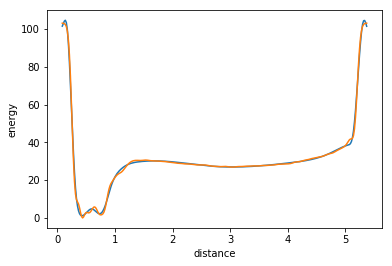

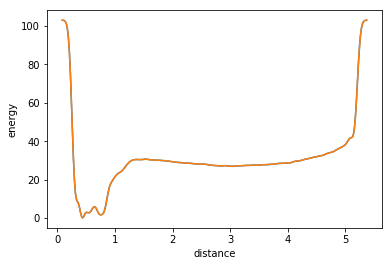

-2.53543478001 -1.394861504
-4.85314302154 -5.032636369
-15.4110906779 -15.282929981
-40.4527550561 -40.427383876
-94.0392518363 -93.952258497
-192.034671418 -191.867921478
-344.176189631 -343.853161053
-539.738745605 -539.371733183
-737.256815814 -737.124221946
-871.136048082 -871.325693834
-880.158463708 -880.505136999
-745.329920645 -745.560426342
-510.635313363 -510.506652679
-266.206317433 -265.74527498
-100.284193929 -99.716376716
-50.3406663763 -49.967130907
-86.2681085755 -86.237219786
-136.811601233 -137.050933909
-140.275901017 -140.50632886
-83.3736443572 -83.361759422
-1.50208693652 -1.19063974
56.158124325 56.407524912
64.7908249796 64.333867353
36.0446222257 35.390544263
2.5221999135 2.050344499
-11.5041298774 -12.07617012
-2.18744553843 -2.335573601
20.0950031819 19.951947761
41.0742783809 40.975731007
51.2489500205 50.894946291
45.3146393022 44.681983042
22.6706173962 22.248934826
-10.9757419001 -11.165588448
-44.138454471 -44.400548079
-63.5247007292 -63.918364255
-61.

/Users/garrett/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:32: FutureWarning: sort(....) is deprecated, use sort_index(.....)


-1.75966201237 -2.001398645
-1.22647453278 -1.459073925
-0.656175552802 -0.904632637
-0.86026884918 -1.089840359
-1.94379467989 -2.159236932
-3.01248577189 -3.266119878
-3.25309397197 -3.540459911
-2.42220888748 -2.637017941
-1.37498607233 -1.641143812
-1.26502960552 -1.492198714
-2.36665025043 -2.615012909
-4.08379031689 -4.29638563
-5.22065387356 -5.467032743
-5.17603521501 -5.427367209
-4.18700865178 -4.42467937
-3.17032914316 -3.388288902
-2.83558322317 -3.066831836
-3.26028807348 -3.520052841
-3.98206594834 -4.216821189
-4.56702848618 -4.804567403
-4.80643353819 -5.028540603
-4.49966904321 -4.747210718
-3.55039862423 -3.794121288
-2.20967939123 -2.435252223
-1.21592594307 -1.469227493
-1.3623443107 -1.600645281
-2.57017262861 -2.792642426
-3.98301019401 -4.232156452
-4.57796166766 -4.815210546
-3.91514329949 -4.19663219
-2.44401463145 -2.676568114
-0.915199028963 -1.164033314
-0.135981971253 -0.394032737
-0.357516270222 -0.591775084
-1.44307341496 -1.699609956
-2.97542453894 -3.21

In [26]:
filename='files/fes'+str(1)+'.dat'
data1=pd.read_csv(filename,skiprows=5,names=['distance','energy','error'],delim_whitespace=True)
#f=interp1d(data1['distance'],data1['energy'],kind='cubic',fill_value='extrapolate')
#spl = UnivariateSpline(data1['distance'], data1['energy'])
#plt.plot(data1['distance'],spl(data1['distance']),data1['distance'],data1['energy'])#,data2['distance'],data2['energy'], lw=1)
#plt.xlabel('distance')
#plt.ylabel('energy')
#plt.ylim([0,110])
#plt.xlim([0,5.5])
#plt.title(listofinteractions[i-1]+' free energy surface (should definitely be the same)')
#plt.show()

spl2 = InterpolatedUnivariateSpline(data1['distance'], data1['energy'])
plt.plot(data1['distance'],spl2(data1['distance']),data1['distance'],data1['energy'])#,data2['distance'],data2['energy'], lw=1)
plt.xlabel('distance')
plt.ylabel('energy')
#plt.ylim([0,110])
#plt.xlim([0,5.5])
#plt.title(listofinteractions[i-1]+' free energy surface (should definitely be the same)')
plt.show()
for index,row in data1.iterrows():
    
    deriv=spl2.derivatives(row['distance'])
    print(deriv[1],row['error'])#,row['distance'])
    df=pd.DataFrame([-row['distance'],row['energy'],row['error']])#,columns=['distance','energy','error'])

    df=df.transpose()
    df.columns=['distance','energy','error']

    data1.loc[-1]=[-row['distance'],row['energy'],row['error']]
    data1.index = data1.index + 1
    data1=data1.sort()
    

In [23]:
x = np.linspace(0, 3, 11)
y = x**2
spl3 = UnivariateSpline(x, y)
spl3.derivatives(1.5)
#array([2.25, 3.0, 2.0, 0])

array([ 2.25,  3.  ,  2.  ,  0.  ])